# Phân tích & trực quan hóa dữ liệu lead VIP

Notebook này dùng để khám phá bộ dữ liệu lead (CRM) phục vụ cho bài toán **chấm điểm & phân loại lead VIP**.

Các bước chính:
1. Nạp dữ liệu và xem tổng quan.
2. Phân tích phân bố trạng thái *qualification_status* và *final_score*.
3. Phân tích theo các cột quan trọng: `source`, `status`, `is_vip`, `no_of_employees`, `city`.
4. Tạo một số trực quan hóa hỗ trợ hiểu mô hình chấm điểm.

> ⚠️ Mặc định notebook giả định file dữ liệu tên **`data.csv`** nằm cùng thư mục với notebook. Nếu bạn để file ở chỗ khác thì sửa lại biến `DATA_PATH` bên dưới.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Để bảng hiển thị đẹp hơn
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Đường dẫn tới file dữ liệu
DATA_PATH = "data.csv" 

df = pd.read_csv(DATA_PATH)
df.head()

,name,owner,creation,modified,modified_by,docstatus,naming_series,first_name,middle_name,last_name,lead_name,source,lead_owner,status,distributed_status,custom_lead_classification,email_id,mobile_no,phone,no_of_employees,job_title,is_vip,annual_revenue,territory,city,country,qualification_status,company,language,image,title,disabled,unsubscribed,blog_subscriber,doctype,custom_return_lead_log,notes,final_score
0,CRM-LEAD-2025-075722,Administrator,2025-09-08 06:05:35.474779,2025-09-08 06:06:00.474779,Administrator,0,CRM-LEAD-.YYYY.-,Vo,Ngoc,Hoa,Vo Ngoc Hoa,Email,Administrator,Converted,Mới,NaN,vo-ngoc-hoa4281@company.vn,8154614123,9623782436,5001-10000,Nhân viên,0,0,Quốc tế,Bình Dương,Vietnam,Unqualified,GreenMedia,en,NaN,Vo Ngoc Hoa,0,0,0,Lead,[],[],58
1,CRM-LEAD-2025-080185,Administrator,2025-02-13 03:48:20.918645,2025-02-13 04:41:12.918645,Administrator,0,CRM-LEAD-.YYYY.-,Dinh,Khanh,Trang,Dinh Khanh Trang,Website,Administrator,Converted,Đang xử lý,NaN,dinh-khanh-trang2577@gmail.com,8825811978,7176006449,1-10,Trưởng nhóm,0,0,Quốc tế,TP Hồ Chí Minh,Vietnam,Unqualified,MegaGroup,en,NaN,Dinh Khanh Trang,0,0,0,Lead,[],[],43
2,CRM-LEAD-2025-019865,Administrator,2025-08-16 07:07:53.661279,2025-08-16 08:08:12.661279,Administrator,0,CRM-LEAD-.YYYY.-,Phan,Quang,Nhi,Phan Quang Nhi,Email,Administrator,Open,Đang xử lý,NaN,phan-quang-nhi6080@company.vn,2395871671,9367244226,11-50,Hành chính,0,0,Quốc tế,Đồng Nai,Vietnam,Unqualified,BlueGroup,en,NaN,Phan Quang Nhi,0,0,0,Lead,[],[],41
3,CRM-LEAD-2025-076700,Administrator,2025-12-13 06:30:21.259225,2025-12-13 07:13:50.259225,Administrator,0,CRM-LEAD-.YYYY.-,Dinh,Minh,Dung,Dinh Minh Dung,Email,Administrator,Open,Mới,NaN,dinh-minh-dung577@gmail.com,360638958,991106143,501-1000,Nhân viên,0,0,Miền nam,Biên Hòa,Vietnam,Junk,MegaTech,vi,NaN,Dinh Minh Dung,0,0,0,Lead,[],[],11
4,CRM-LEAD-2025-092992,Administrator,2025-09-25 17:13:06.546655,2025-09-25 17:13:51.546655,Administrator,0,CRM-LEAD-.YYYY.-,Tran,Huu,Phuong,Tran Huu Phuong,Website,Administrator,Replied,Đang xử lý,NaN,tran-huu-phuong594@vinacorp.vn,862102279,352915364,11-50,Nhân viên,0,0,Miền trung,Đà Nẵng,Vietnam,Junk,PacificSoft,vi,NaN,Tran Huu Phuong,0,0,0,Lead,[],[],10


## 1. Tổng quan dữ liệu

In [2]:
print("Số dòng:", len(df))
print("Số cột:", df.shape[1])
print("\nCác cột trong dữ liệu:")
print(df.columns.tolist())

print("\nThông tin kiểu dữ liệu:")
df.info()

Số dòng: 10000
Số cột: 38

Các cột trong dữ liệu:
['name', 'owner', 'creation', 'modified', 'modified_by', 'docstatus', 'naming_series', 'first_name', 'middle_name', 'last_name', 'lead_name', 'source', 'lead_owner', 'status', 'distributed_status', 'custom_lead_classification', 'email_id', 'mobile_no', 'phone', 'no_of_employees', 'job_title', 'is_vip', 'annual_revenue', 'territory', 'city', 'country', 'qualification_status', 'company', 'language', 'image', 'title', 'disabled', 'unsubscribed', 'blog_subscriber', 'doctype', 'custom_return_lead_log', 'notes', 'final_score']

Thông tin kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   owner                       10000 non-null  object 
 2   creation                    10000 non-null  object 
 3   

### 1.1. Thiếu dữ liệu (missing values)

In [3]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.head(30)

image                         10000
custom_lead_classification    10000
dtype: int64

### 1.2. Thống kê mô tả cho các cột số

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
docstatus,10000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
custom_lead_classification,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobile_no,10000.0,2.605907e+09,2.877824e+09,2198326.0,6.253344e+08,916639161.5,4.276508e+09,9.999491e+09
phone,10000.0,2.623069e+09,2.897375e+09,1021150.0,6.962094e+08,918116867.0,4.380469e+09,9.998878e+09
is_vip,10000.0,1.891000e-01,3.916076e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00
annual_revenue,10000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
image,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disabled,10000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
unsubscribed,10000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00
blog_subscriber,10000.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00


## 2. Phân bố **qualification_status** và **final_score**

In [5]:
# Đếm số lượng theo qualification_status
qual_counts = df['qualification_status'].value_counts(dropna=False)
qual_counts

qualification_status
Qualified      4321
Junk           2843
Unqualified    2836
Name: count, dtype: int64

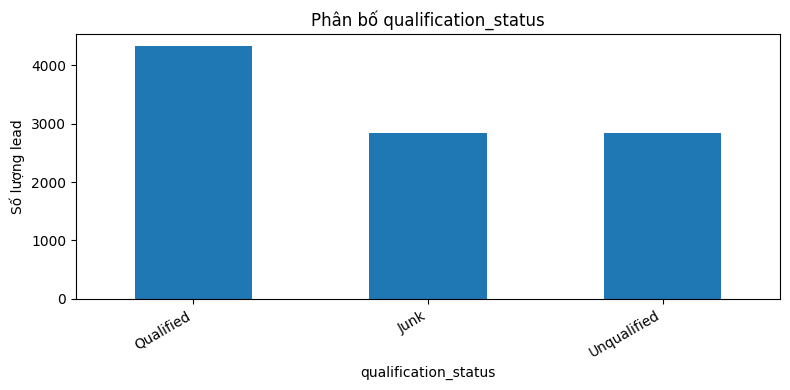

In [6]:
plt.figure(figsize=(8, 4))
qual_counts.plot(kind="bar")
plt.title("Phân bố qualification_status")
plt.xlabel("qualification_status")
plt.ylabel("Số lượng lead")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

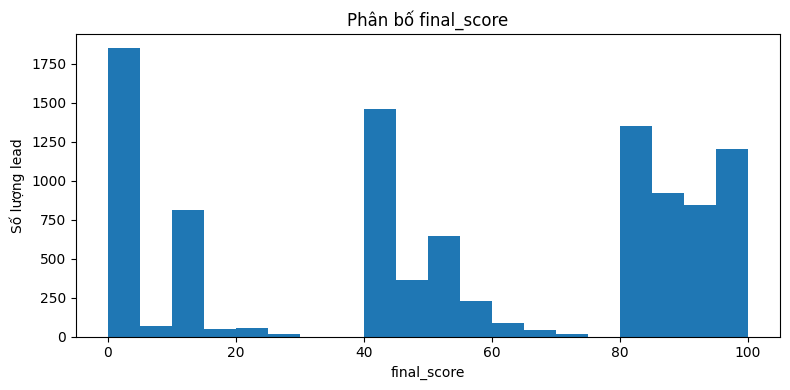

In [7]:
# Phân bố final_score
if 'final_score' in df.columns:
    plt.figure(figsize=(8, 4))
    df['final_score'].plot(kind="hist", bins=20)
    plt.title("Phân bố final_score")
    plt.xlabel("final_score")
    plt.ylabel("Số lượng lead")
    plt.tight_layout()
    plt.show()
else:
    print("Không tìm thấy cột 'final_score' trong dữ liệu.")

<Figure size 800x400 with 0 Axes>

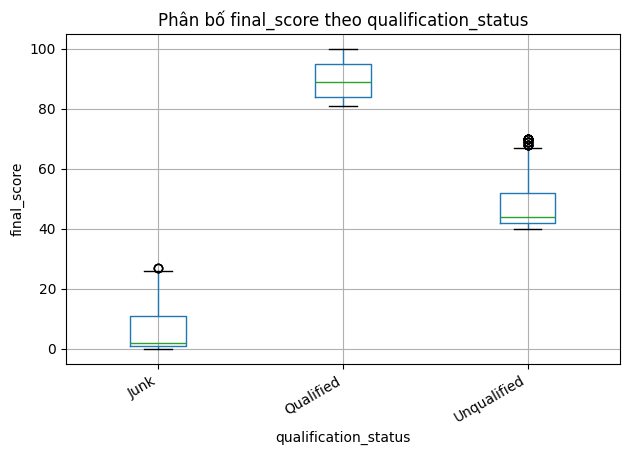

In [8]:
if 'final_score' in df.columns:
    plt.figure(figsize=(8, 4))
    df.boxplot(column='final_score', by='qualification_status')
    plt.title("Phân bố final_score theo qualification_status")
    plt.suptitle("")
    plt.xlabel("qualification_status")
    plt.ylabel("final_score")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

## 3. Phân tích theo các cột quan trọng

Các cột quan trọng cho bài toán chấm điểm:
- `source`: nguồn lead.
- `status`: trạng thái quy trình (New / Qualified / Junk / ...).
- `is_vip`: lead VIP (1) hay thường (0).
- `no_of_employees`: quy mô công ty.
- `city`: thành phố.

### 3.1. Nguồn lead (`source`)

source
Telesales     1321
Email         1276
Facebook      1260
Google Ads    1257
Website       1256
LinkedIn      1231
Event         1214
Referral      1185
Name: count, dtype: int64

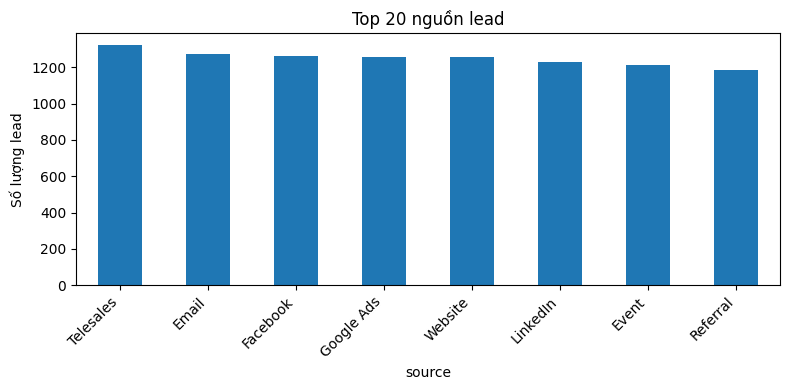

In [9]:
if 'source' in df.columns:
    source_counts = df['source'].value_counts().head(20)
    display(source_counts)

    plt.figure(figsize=(8, 4))
    source_counts.plot(kind="bar")
    plt.title("Top 20 nguồn lead")
    plt.xlabel("source")
    plt.ylabel("Số lượng lead")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    if 'final_score' in df.columns:
        source_score = (
            df.groupby('source')['final_score']
            .agg(['count', 'mean'])
            .sort_values('count', ascending=False)
            .head(20)
        )
        source_score
else:
    print("Không có cột 'source' trong dữ liệu.")

### 3.2. Trạng thái lead (`status`)

status
Open         4533
Replied      2497
Converted    1997
Lost          973
Name: count, dtype: int64

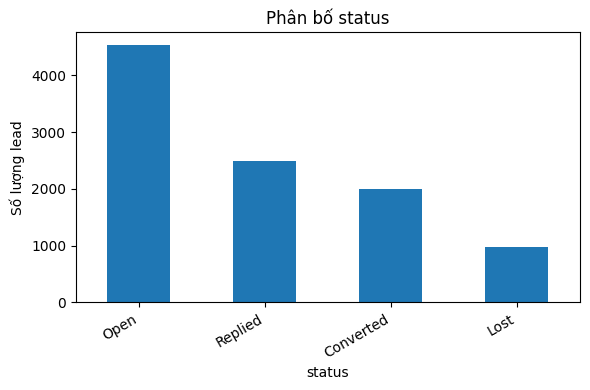

In [10]:
if 'status' in df.columns:
    status_counts = df['status'].value_counts()
    display(status_counts)

    plt.figure(figsize=(6, 4))
    status_counts.plot(kind="bar")
    plt.title("Phân bố status")
    plt.xlabel("status")
    plt.ylabel("Số lượng lead")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

    if 'final_score' in df.columns:
        status_score = (
            df.groupby('status')['final_score']
            .agg(['count', 'mean'])
            .sort_values('mean', ascending=False)
        )
        status_score
else:
    print("Không có cột 'status' trong dữ liệu.")

### 3.3. Lead VIP (`is_vip`)

is_vip
0    8109
1    1891
Name: count, dtype: int64

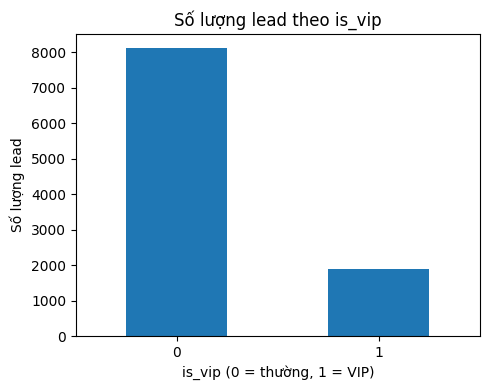

In [11]:
if 'is_vip' in df.columns:
    vip_counts = df['is_vip'].value_counts()
    display(vip_counts)

    plt.figure(figsize=(5, 4))
    vip_counts.plot(kind="bar")
    plt.title("Số lượng lead theo is_vip")
    plt.xlabel("is_vip (0 = thường, 1 = VIP)")
    plt.ylabel("Số lượng lead")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    if 'final_score' in df.columns:
        vip_score = (
            df.groupby('is_vip')['final_score']
            .agg(['count', 'mean'])
        )
        vip_score
else:
    print("Không có cột 'is_vip' trong dữ liệu.")

### 3.4. Quy mô công ty (`no_of_employees`)

Một vài giá trị mẫu của no_of_employees:


0     5001-10000
1           1-10
2          11-50
3       501-1000
4          11-50
5       501-1000
6          11-50
7           1-10
8        201-500
9           1-10
10          1-10
11          1-10
12         11-50
13        51-200
14       201-500
15          1-10
16         11-50
17          1-10
18        51-200
19        51-200
Name: no_of_employees, dtype: object

Kiểu dữ liệu: object

Không convert được sang số – dùng dạng category để phân tích.


no_of_employees
1-10          2615
11-50         2203
51-200        1996
201-500       1264
501-1000       809
1001-5000      659
5001-10000     278
10000+         176
Name: count, dtype: int64

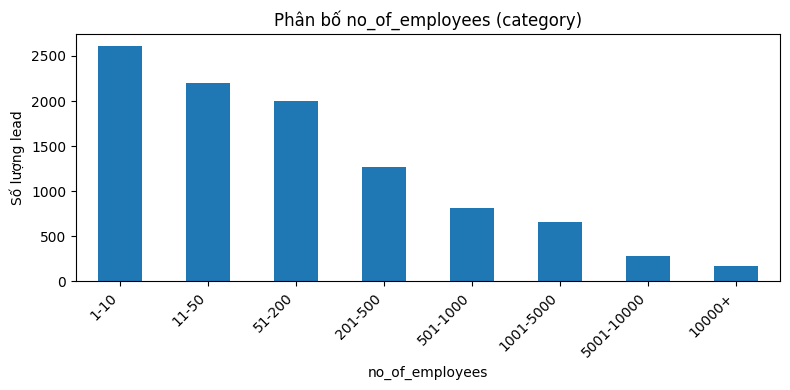

In [14]:
if 'no_of_employees' in df.columns:
    raw_emp = df['no_of_employees']
    print("Một vài giá trị mẫu của no_of_employees:")
    display(raw_emp.head(20))
    print("Kiểu dữ liệu:", raw_emp.dtype)

    # Thử convert sang số
    emp_num = pd.to_numeric(raw_emp, errors='coerce')

    if emp_num.notna().sum() == 0:
        # ==== TRƯỜNG HỢP KHÔNG CONVERT ĐƯỢC SANG SỐ  ====
        print("\nKhông convert được sang số – dùng dạng category để phân tích.")

        counts = raw_emp.value_counts()
        display(counts)

        plt.figure(figsize=(8, 4))
        counts.plot(kind="bar")
        plt.title("Phân bố no_of_employees (category)")
        plt.xlabel("no_of_employees")
        plt.ylabel("Số lượng lead")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    else:
        # ==== TRƯỜNG HỢP CHUYỂN ĐƯỢC SANG SỐ  ====
        df['no_of_employees_num'] = emp_num
        emp_nonnull = emp_num.dropna()

        plt.figure(figsize=(8, 4))
        emp_nonnull.plot(kind="hist", bins=20)
        plt.title("Phân bố số lượng nhân viên")
        plt.xlabel("no_of_employees")
        plt.ylabel("Số lượng lead")
        plt.tight_layout()
        plt.show()

        # Bucket hoá quy mô công ty
        bins = [-1, 10, 50, 200, 1000, np.inf]
        labels = ["<=10", "11-50", "51-200", "201-1000", "1000+"]
        df['employees_bucket'] = pd.cut(emp_num, bins=bins, labels=labels)

        bucket_counts = df['employees_bucket'].value_counts().sort_index()
        display(bucket_counts)

        plt.figure(figsize=(7, 4))
        bucket_counts.plot(kind="bar")
        plt.title("Phân bố quy mô công ty (bucket)")
        plt.xlabel("bucket")
        plt.ylabel("Số lượng lead")
        plt.tight_layout()
        plt.show()

        if 'final_score' in df.columns:
            bucket_score = (
                df.groupby('employees_bucket')['final_score']
                .agg(['count', 'mean'])
                .sort_index()
            )
            bucket_score
else:
    print("Không có cột 'no_of_employees' trong dữ liệu.")


### 3.5. Phân bố theo thành phố (`city`)

city
Hải Phòng         645
Đà Nẵng           631
Huế               614
Nha Trang         610
Bắc Ninh          598
Quảng Ninh        578
Hà Nội            568
Cần Thơ           553
Quy Nhơn          493
TP.HCM            475
Biên Hòa          471
Vũng Tàu          438
Thái Bình         192
Bình Dương        161
TP Hồ Chí Minh    159
Đồng Nai          158
Nam Định          158
Quảng Nam         157
Quảng Bình        157
Long An           157
Name: count, dtype: int64

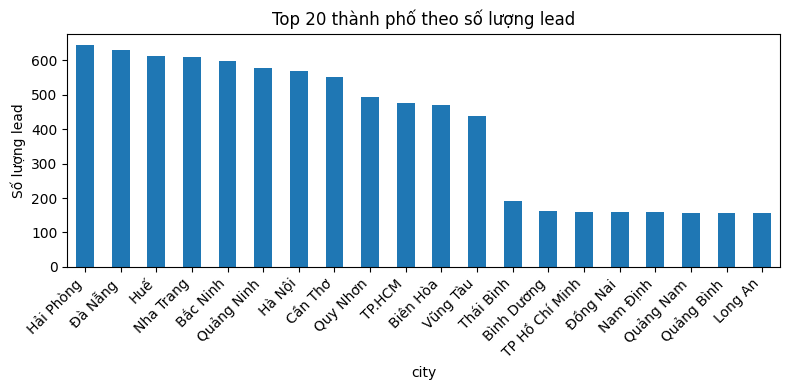

In [13]:
if 'city' in df.columns:
    city_counts = df['city'].value_counts().head(20)
    display(city_counts)

    plt.figure(figsize=(8, 4))
    city_counts.plot(kind="bar")
    plt.title("Top 20 thành phố theo số lượng lead")
    plt.xlabel("city")
    plt.ylabel("Số lượng lead")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Không có cột 'city' trong dữ liệu.")